In [1]:
include("inference/mcmc/sepsis_types.jl")
using .SepsisTypes
include("inference/mcmc/sepsis.jl")
using .Sepsis
include("inference/mcmc/inference.jl")
using .Inference
include("inference/mcmc/softmax.jl")
using .Softmax
include("inference/mcmc/smart.jl")
using .Smart
include("inference/mcmc/value_iter.jl")
using .ValueIteration
using Revise
using PyCall;
using Gen;
using CairoMakie
sepsis_gym = pyimport("custom_sepsis");
np = pyimport("numpy");
using BenchmarkTools
using Serialization

In [2]:
mutable struct History
    choices  # Equivalent to choicemap()
    policies::Vector{Policy}
    start_states::Vector{State}
    index::Int
    params::Dict
    scores::Dict
    acceptance::Dict
    mean_rewards::Dict

    function History()
        return new(choicemap(), [], [], 0, Dict(), Dict(), Dict(), Dict())
    end
end;


In [3]:

function load_history(name::String)::History
    # Implement loading from file, e.g., using Serialization
    open(name, "r") do io
        return deserialize(io)
    end
end

load_history (generic function with 1 method)

In [4]:
histories = [load_history("data/mcmc/history-linear-$(i).jld") for i in 1:10];

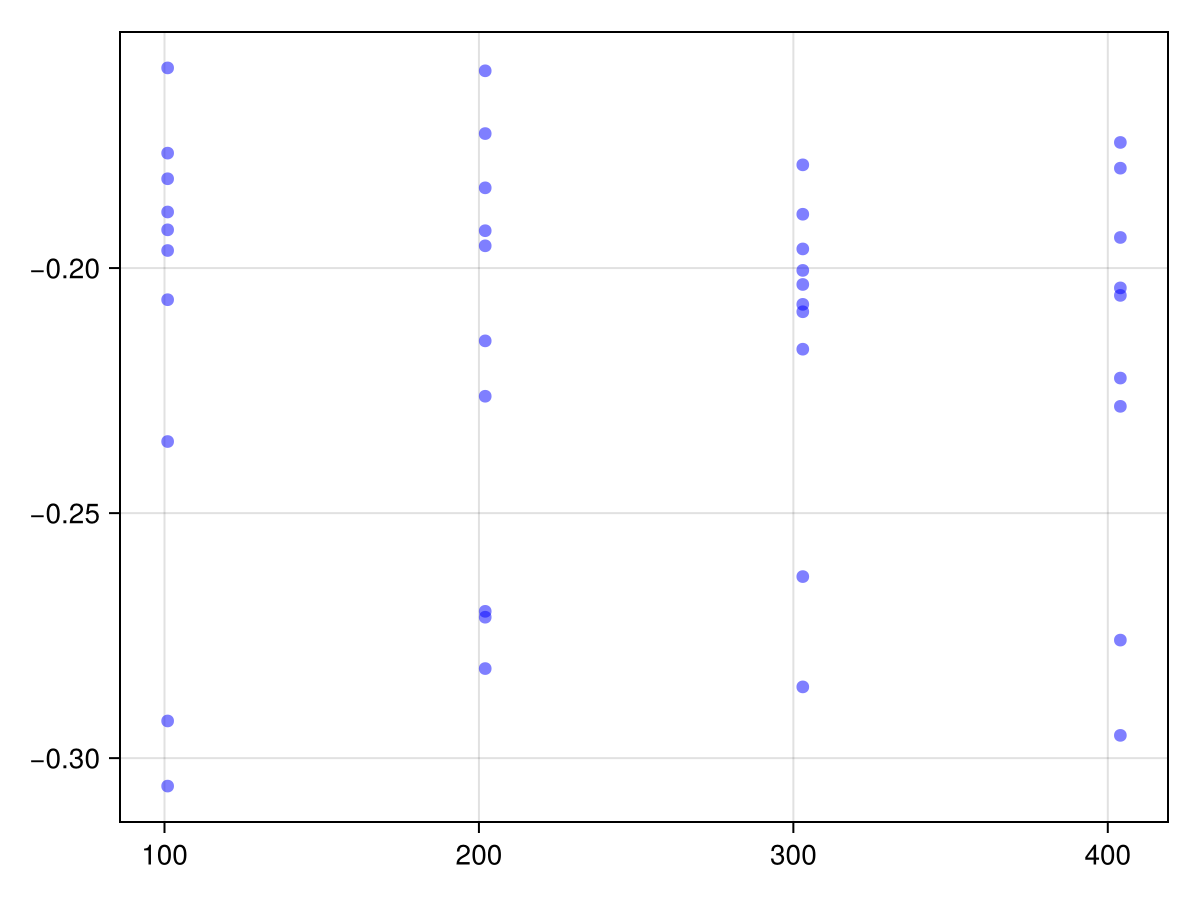

In [5]:

fig = Figure()
ax = Axis(fig[1, 1])

for i in 1:10
    history = histories[i]
    ks = sort(collect(keys(history.mean_rewards)))
    plot!(ax, ks, [history.mean_rewards[k] for k in ks], alpha=0.5, color="blue")
end

fig
